# Лабораторна робота 3 (2 частина)

Романенко Ілля ФІТ 4-7

23 варіант

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Крок 1

Завантажимо датасет California Housing Dataset

In [75]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
dataFrame = pd.DataFrame(data=X, columns=data.feature_names)
dataFrame['target'] = y

dataFrame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Проведемо попередній аналіз даних

In [76]:
dataFrame.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [77]:
dataFrame.duplicated().sum()

0

In [78]:
print('типи даних по колонках:\n',  dataFrame.dtypes)

типи даних по колонках:
 MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


In [79]:
dataFrame.shape

(20640, 9)

In [80]:
dataFrame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Крок 2

Масштабуємо ознаки

In [81]:
X = dataFrame.drop('target', axis=1)
y = dataFrame['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Крок 3

Поділимо дані на тренувальні і тестові

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Крок 3

Побудуємо три моделі: лін. регресія, випадковий ліс, рідж.

In [95]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}

param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 2, 3, 3.5, 3.7, 3.745, 3.75, 4, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 180, 190, 200, 210, 220],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}

for name, model in models.items():
    print(f"\nНалаштовуємо параметри для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Налаштовуємо параметри для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштовуємо параметри для Ridge Regression...


Найкращі параметри для Ridge Regression: {'alpha': 3.745}

Налаштовуємо параметри для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': 20, 'n_estimators': 210}

Оцінка Linear Regression:
Mean Squared Error: 0.53
R^2 Score: 0.60

Оцінка Ridge Regression:
Mean Squared Error: 0.53
R^2 Score: 0.60

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25
R^2 Score: 0.81


## Крок 4

Побудуємо графіки

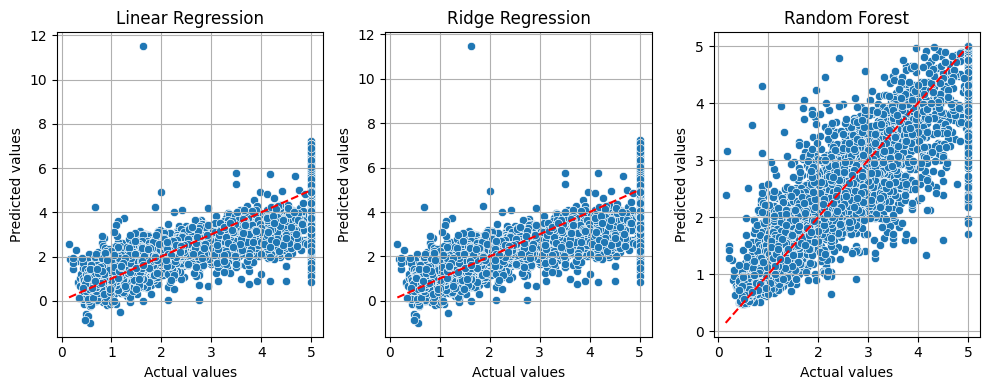

In [98]:
# Візуалізація результатів
plt.figure(figsize=(10, 4))

# Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Ridge Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Ridge Regression')
plt.grid(True)

# Ridge Regression
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()

## Висновки

- модель лінійної регресії та рідж в данному випадку показали досить середній результат, обоє отримали оцінку R^2 в 0.6

- модель рандом форест показала себе досить добре, оцінка R^2 в 0.81 достатньо непоганий результат. Модель випадкового лісу показала себе досить гарно на основі цього датасету, тому її можна використовувати для подальшого прогрозування.